In [13]:
import pandas as pd
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')
from prophet.plot import plot_components, add_changepoints_to_plot

In [2]:
df = pd.read_csv('Data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.shape

(144, 2)

In [4]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.ds = pd.to_datetime(df.ds)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
model = Prophet()
model.fit(df)

03:50:19 - cmdstanpy - INFO - Chain [1] start processing
03:50:20 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future_df = model.make_future_dataframe(periods=48,freq='MS')
forecast = model.predict(future_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,54.282726,113.841588,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,48.386507,106.241829,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,82.630828,139.776591,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,79.854839,138.030013,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,81.735749,139.889478,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255


D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda\envs\tsa_course\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


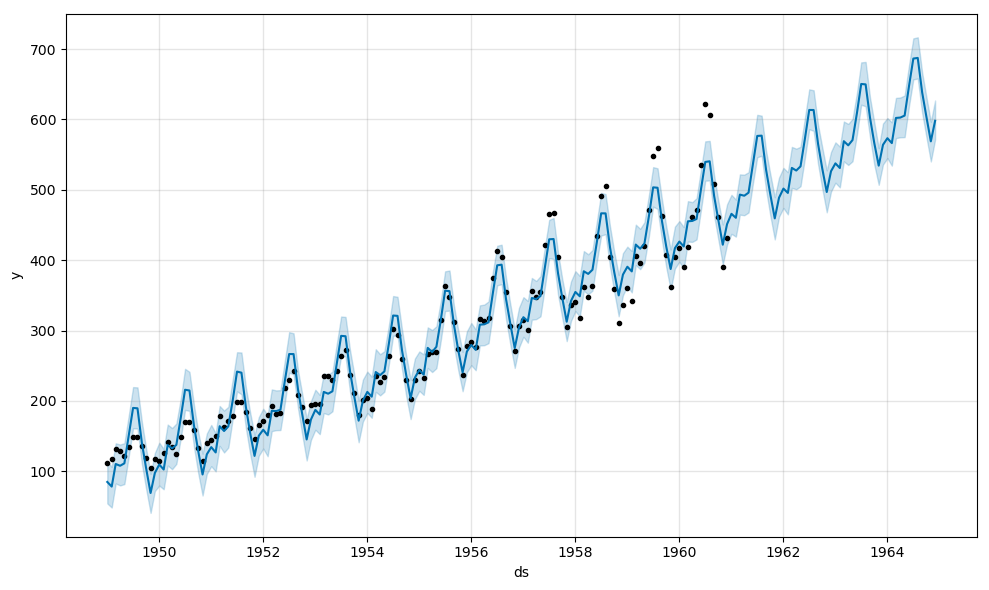

In [8]:
model.plot(forecast);

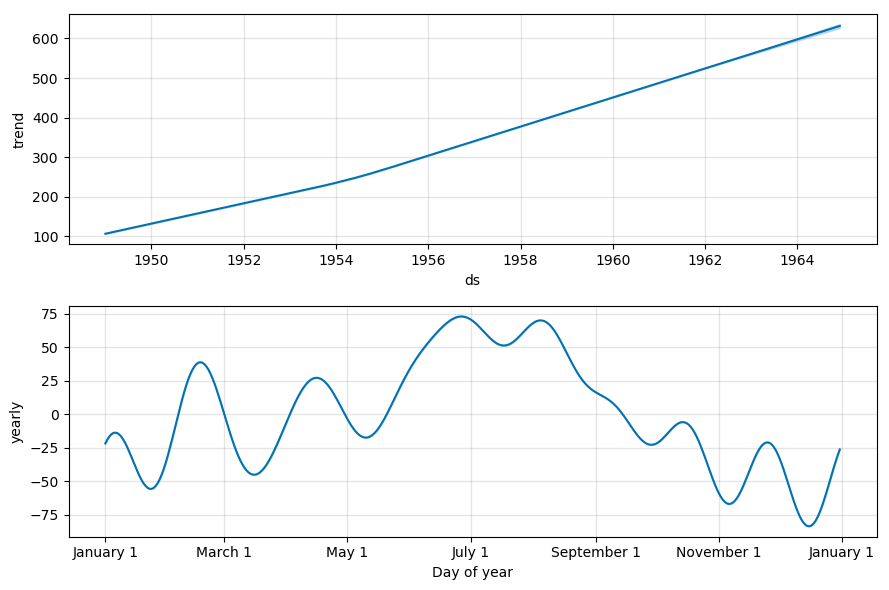

In [12]:
model.plot_components(forecast);

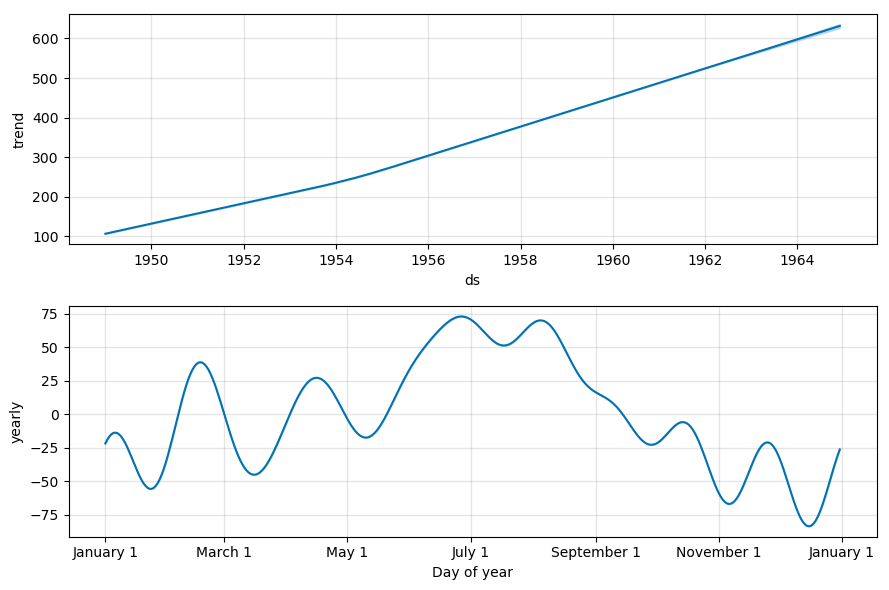

In [11]:
plot_components(model,forecast);

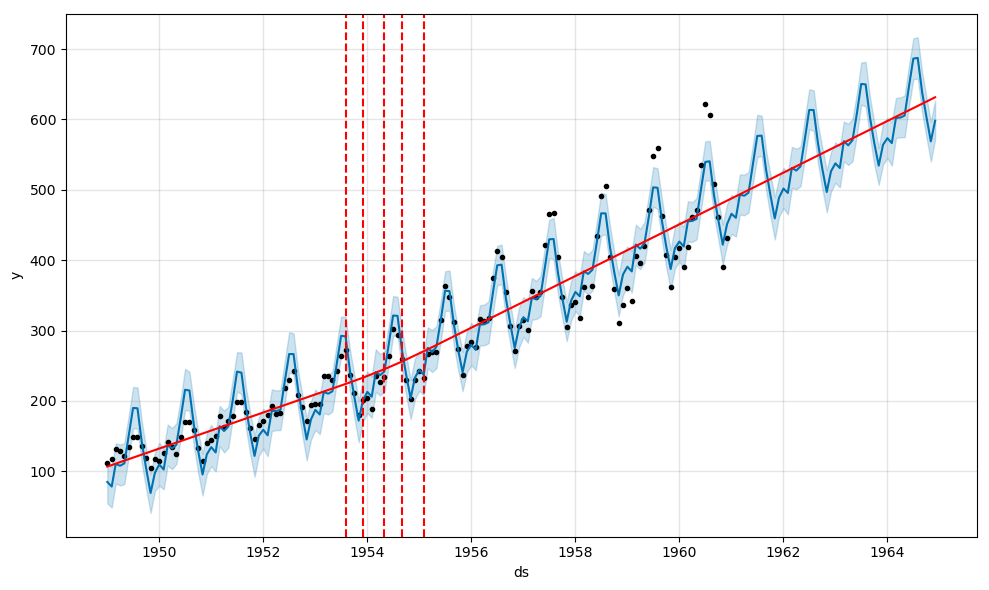

In [14]:
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(),model,forecast);

In [15]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)

03:57:12 - cmdstanpy - INFO - Chain [1] start processing
03:57:12 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future_df = model.make_future_dataframe(periods=48,freq='MS')
forecast = model.predict(future_df)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,113.827244,89.021703,116.394754,113.827244,113.827244,-0.092145,-0.092145,-0.092145,-0.092145,-0.092145,-0.092145,0.0,0.0,0.0,103.338592
1,1949-02-01,115.585256,85.782419,113.560953,115.585256,115.585256,-0.136044,-0.136044,-0.136044,-0.136044,-0.136044,-0.136044,0.0,0.0,0.0,99.860527
2,1949-03-01,117.173137,100.931703,128.897281,117.173137,117.173137,-0.021025,-0.021025,-0.021025,-0.021025,-0.021025,-0.021025,0.0,0.0,0.0,114.709571
3,1949-04-01,118.931148,103.044702,129.436083,118.931148,118.931148,-0.024898,-0.024898,-0.024898,-0.024898,-0.024898,-0.024898,0.0,0.0,0.0,115.970009
4,1949-05-01,120.632450,105.461672,132.143690,120.632450,120.632450,-0.013265,-0.013265,-0.013265,-0.013265,-0.013265,-0.013265,0.0,0.0,0.0,119.032229


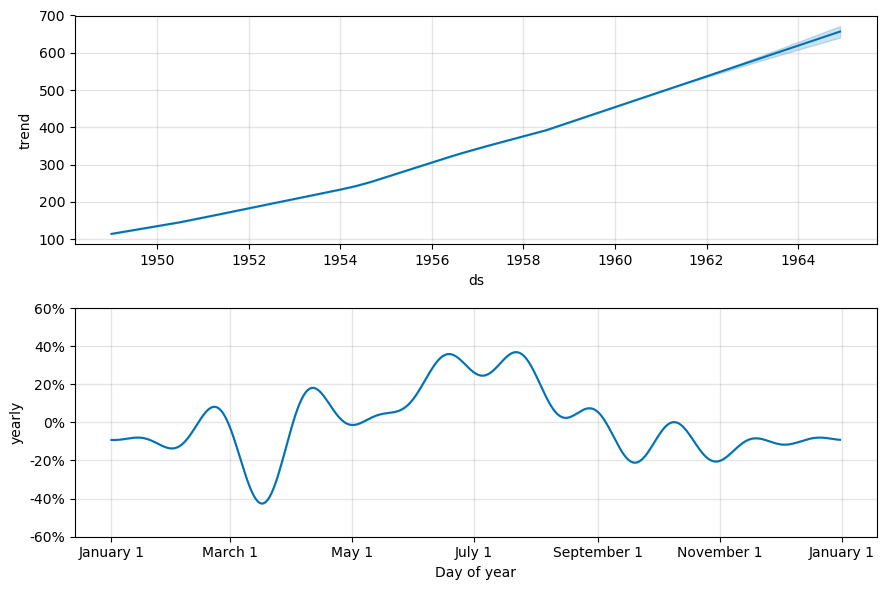

In [22]:
fig = model.plot_components(forecast);

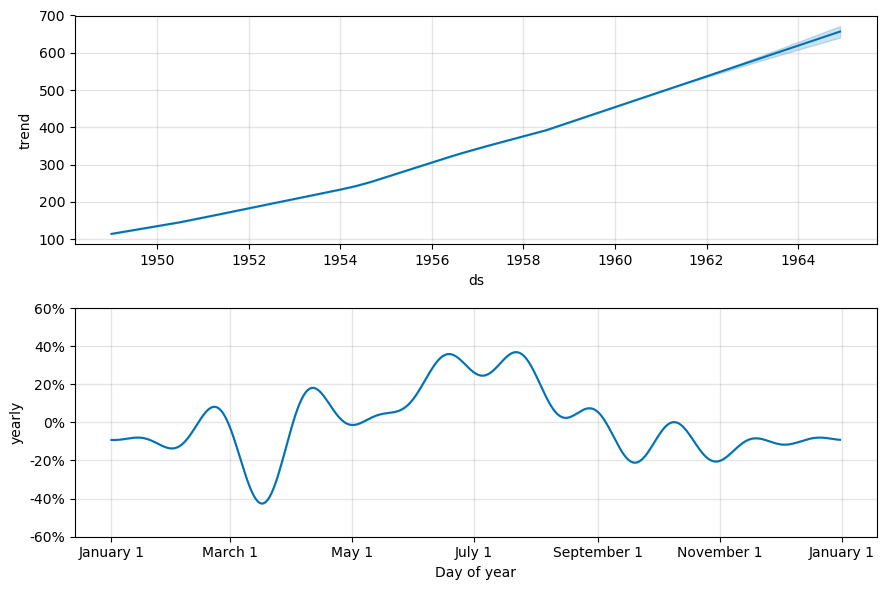

In [23]:
plot_components(model,forecast);

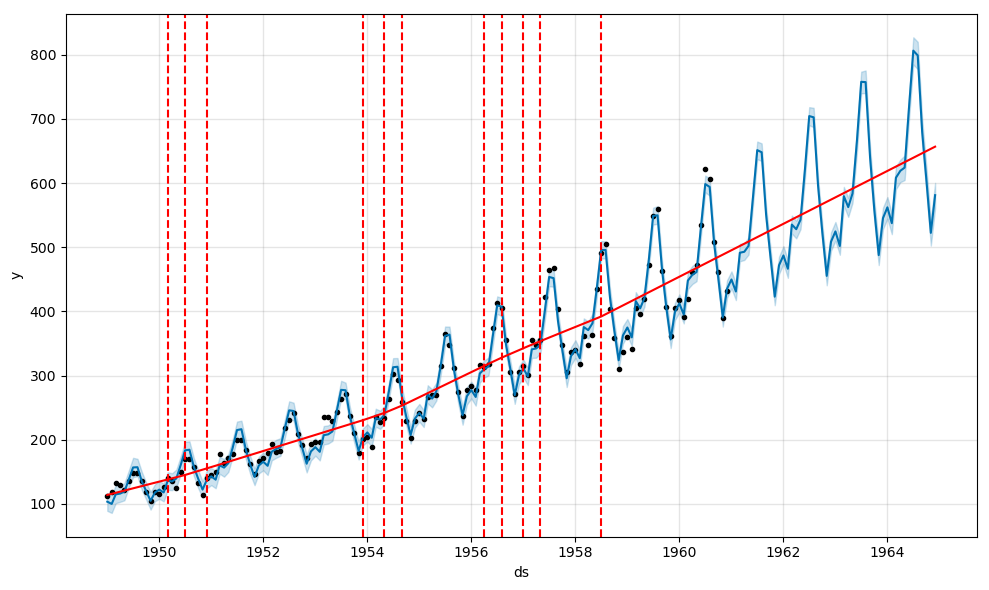

In [24]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),model,forecast);